In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D




In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'


In [9]:
dsv1 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80.nc'))] #local
dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2*'))] #local

In [10]:
number = len(dsv1)
cmap_Ta = plt.get_cmap('Greys')
cmap = plt.get_cmap('YlOrBr')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                ]


In [13]:
d['Uprime']

<xarray.DataArray 'Uprime' (y_rho: 722)>
array([0.000136, 0.00012 , 0.000103, ..., 0.001369, 0.001635, 0.001604],
      dtype=float32)
Coordinates:
    time_instant  float64 540.0
    time_counter  float64 540.0
    mode          int64 1
    f             (y_rho) float32 7.978978e-05 7.985453e-05 ... 0.00012647022
    y_u           (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
  * y_rho         (y_rho) float32 -2000.0 2000.0 6000.0 ... 2878000.0 2882000.0
    f_rho         (y_rho) float32 7.978978e-05 7.985453e-05 ... 0.00012647022
    y_bins        (y_rho) float32 -2.0 2.0 6.0000005 ... 2878.0002 2882.0002

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remov

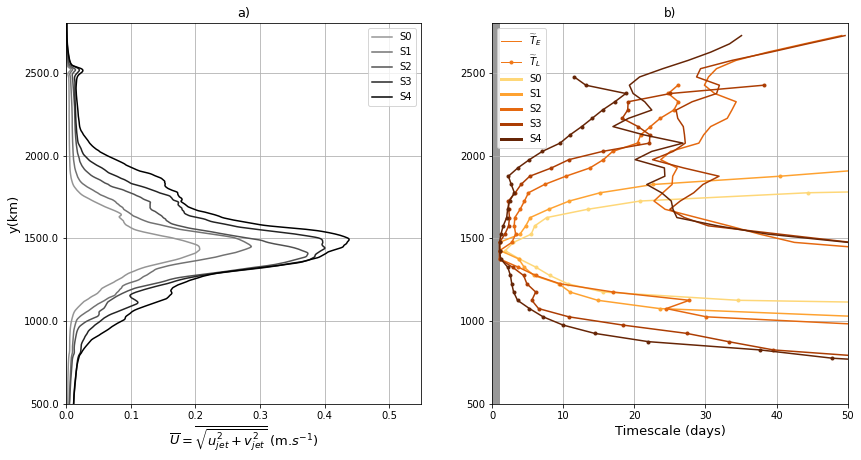

In [16]:
fontsize = 13
labels=[r'$\widetilde{T}_E$', r'$\widetilde{T}_L$']
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(dsv1):
    #file = sorted(glob(path+'wp*'))[i]
    #wp = i
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='S%s'% i)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title('a)',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)
fig.savefig('/Users/zcaspar/codes/figure6.pdf')

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


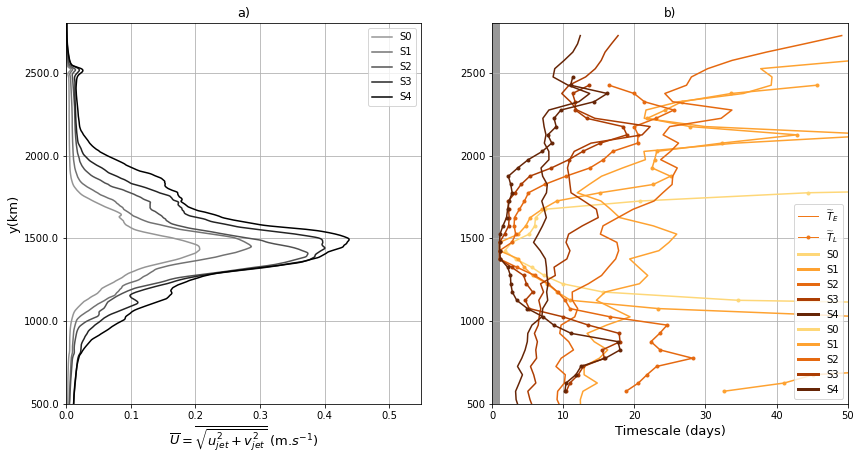

In [17]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(dsv2):
    #file = sorted(glob(path+'wp*'))[i]
    #wp = i
    d['Uprime'].plot(ax=ax[0],y='y_rho',c=colors_Ta[i],label='S%s'% i)
    ax[0].set_ylim(500*1e3,2800*1e3)
    laby = ax[0].get_yticks();laby = [str(l*1e-3) for l in laby];
    ax[0].set_yticklabels(laby)
    d['E_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i])
    d['L_u_avg'].sel(param='Tt').plot(ax=ax[1],y='ybin',c=colors[i],marker='.')
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
ax[0].set_xlabel(r'$\overline{U}= \overline{\sqrt{u_{jet}^2+v_{jet}^2}}$ (m.$s^{-1}$)',fontsize=fontsize);ax[0].set_ylabel(r'y(km)',fontsize=fontsize);
ax[0].set_title('a)',fontsize=fontsize)
ax[0].grid();ax[1].grid();ax[1].set_title('b)');ax[1].set_ylabel('')
ax[1].legend(custom_lines, labels)
ax[1].set_xlabel('Timescale (days)',fontsize=fontsize)
ax[1].set_ylim(500,2800);ax[0].legend();ax[0].set_xlim(0,0.55);ax[1].set_xlim(0,50)
ax[1].axvspan(0, 1, facecolor='0.2', alpha=0.5)

In [ ]:
ce,cl = 'lightseagreen','firebrick'
lims_uu = [(0,60),(0,40),(0,0.1),(0,0.2),(-0.01,0.05)]
lims_vv = [(0,60),(0,40),(0,0.1),(0,0.2),(-0.01,0.1)]
titles = [r'$\widetilde{T}$',r'$\overline{T}$',r'$\widetilde{X}$',r'$\overline{X}$',r'$\Omega$']
fig,axes = plt.subplots(2,2,figsize=(10,10))
for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims_uu[:2],axes[0,:]):
    for i,d in enumerate(ds80):
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]    
        d['L_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='.')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_u$')
        d['E_u_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_u$')
     #   d['L_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax,marker='+')#,label=r'Lagrangian $\widetilde{'+pa[0]+'}_v$')
     #   d['E_v_avg'].sel(param=pa).plot(y='ybin',c=colors[i],ax=ax)#,label=r'Eulerian $\widetilde{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
   # ax.legend();ax.grid();ax.set_title(title,fontsize=15)
    ax.set_xlabel('Timescale (days)');ax.set_ylabel('y (km)')
for pa,title,lim,ax in zip(['Xtilde','Xbar'],titles[2:],lims_uu[2:],axes[1,:]):
    for i,d in enumerate(ds80):
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1] 
        if i!=3:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian $\overline{'+pa[0]+'}_u$')
            (np.sqrt(d['E_u_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax,marker='+',label=r'Eulerian $\overline{'+pa[0]+'}_u$')
        else:
            (np.sqrt(d['L_u_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',label=r'Lagrangian $\overline{'+pa[0]+'}_u$')
            (np.sqrt(d['E_u_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,marker='+',label=r'Eulerian $\overline{'+pa[0]+'}_u$')

            #        (np.sqrt(d['L_v_avg'].sel(param=pa))/2).plot(y='ybin',c=cl,ax=ax,label=r'Lagrangian $\overline{'+pa[0]+'}_v$')
#        (np.sqrt(d['E_v_avg'].sel(param=pa))/2).plot(y='ybin', c=ce,ax=ax,label=r'Eulerian $\overline{'+pa[0]+'}_v$')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('Timescale (days)')
   # ax.legend();ax.grid();ax.set_title(title,fontsize=15);ax.set_ylabel('y (km)')
fig.tight_layout()

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
for pa,title,lim,ax in zip(['Tt','Tb','Omega'],titles[:3],lims_uu[:3],axes[0,:]):
    out_combL_avg['uu'].params.sel(param=pa).plot(y='ybin',c=cl,ax=ax,marker='.',label='Lagrangian')
    out_combE_avg['uu'].params.sel(param=pa).plot(y='ybin',c=ce,ax=ax,marker='+',label='Eulerian')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend();ax.grid();ax.set_title(title,fontsize=15)
for pa,title,lim,ax in zip(['Xt_ns','Xt_s','Xb'],titles[3:],lims_uu[3:],axes[1,:]):
    np.sqrt(out_combL_avg['uu'].params.sel(param=pa)).plot(y='ybin',c=cl,ax=ax,marker='.',label='Lagrangian')
    np.sqrt(out_combE_avg['uu'].params.sel(param=pa)).plot(y='ybin', c=ce,ax=ax,marker='+',label='Eulerian')
    ax.set_ylim(500,2800);ax.set_xlim(lim);ax.set_xlabel('')
    ax.legend();ax.grid();ax.set_title(title,fontsize=15)
fig.suptitle('Autocorrelation of u')

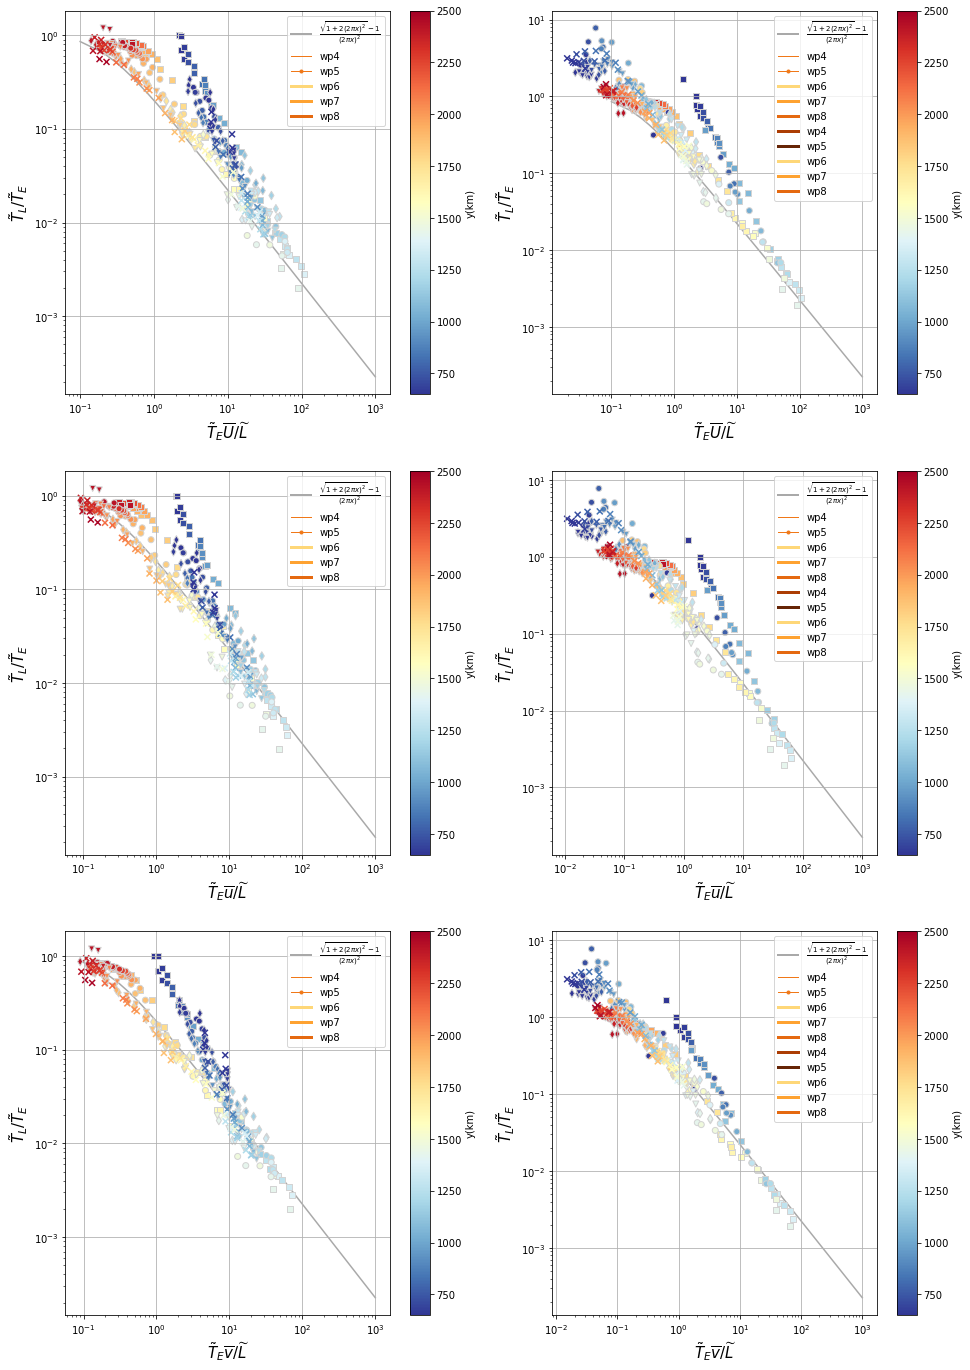

In [29]:
markers=['s','o','d','v','x']
label=[]
fontsize=15
fig,axs = plt.subplots(3,2,figsize=(16,24))
for i,d,m in zip(range(len(dsv1)),dsv1,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0,0].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1,0].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2,0].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=axs[0,0],label='y(km)')
plt.colorbar(cs1,ax=axs[1,0],label='y(km)')
plt.colorbar(cs2,ax=axs[2,0],label='y(km)')
xx = np.linspace(1e-1,1e3,10000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs[:,0]):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)
    
for i,d,m in zip(range(len(dsv2)),dsv2,markers):
    for V in [['E_u_avg','L_u_avg'],['E_v_avg','L_v_avg']]:
        x = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta'].where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x1 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_u'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        x2 = d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d['Ta_v'].isel(s_rho=-1).where(d[V[0]].sel(param='Tt')<2000,drop=True)
        y = d[V[1]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)/d[V[0]].sel(param='Tt').where(d[V[0]].sel(param='Tt')<2000,drop=True)
        file = sorted(glob(path+'wp*'))[i]
        wp = file[-1]
        c = x.ybin.values
        cs = axs[0,1].scatter(x,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs1 = axs[1,1].scatter(x1,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        cs2 = axs[2,1].scatter(x2,y,c=c,edgecolor='lightgrey',marker=m,cmap='RdYlBu_r',vmin=650,vmax=2500)        
        #ax.plot(x,1/np.sqrt(1+x),c='silver',zorder=-1,label=r'1/$\sqrt{1+x}$')
        #ax.plot(x,1/(1+x),c='grey',zorder=-1,label=r'1/(1+x)')
        #ax.plot(x,1/((1+x)**2),c='k',zorder=-1,label=r'1/$(1+x)^2$')
    label.append('wp%s'%wp)
plt.colorbar(cs,ax=axs[0,1],label='y(km)')
plt.colorbar(cs1,ax=axs[1,1],label='y(km)')
plt.colorbar(cs2,ax=axs[2,1],label='y(km)')
xx = np.linspace(1e-1,1e3,10000)
for V,ax in zip(['\overline{U}','\overline{u}','\overline{v}'],axs[:,1]):
    ax.plot(xx,(np.sqrt(1+2*(2*np.pi*xx)**2)-1)/((2*np.pi*xx)**2),c='darkgrey',zorder=-1)
    #    ax.plot(x,1/(1+x**2),c='darkgrey',zorder=-1,label=r'1/$(1+x^2)$')
    #labels.append(r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$')
    ax.grid()
    ax.set_xscale('log');ax.set_yscale('log')
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles+[Line2D([0], [0], color='darkgrey', lw=2)]+custom_lines,labels+[r'$\frac{\sqrt{1+2(2\pi x)^2}-1}{(2\pi x)^2}$']+label)
    ax.set_xlabel(r'$\tilde{T}_E%s/\widetilde{L}$'%V,fontsize=fontsize)
    ax.set_ylabel(r'$\tilde{T}_L/\tilde{T}_E$',fontsize=fontsize)

In [ ]:
Te = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv1]
Tl = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv1]
Tbe = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv1]
Tbl = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv1]
